In [70]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from mlxtend.feature_selection import SequentialFeatureSelector

## Logistic regression

In [71]:
data_preprocessed = pd.read_csv('Data/absenteeism_preprocessed.csv', index_col=0)
data_preprocessed

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0,0,0,1,7,3,1,289,36,13,...,0,0,2,1,0,1,90,172,30,4
1,0,0,0,0,7,3,1,118,13,18,...,1,0,1,1,0,0,98,178,31,0
2,0,0,0,1,7,4,1,179,51,18,...,0,0,0,1,0,0,89,170,31,2
3,1,0,0,0,7,5,1,279,5,14,...,0,0,2,1,1,0,68,168,24,4
4,0,0,0,1,7,5,1,289,36,13,...,0,0,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,1,0,0,0,7,3,1,289,36,13,...,0,0,2,1,0,1,90,172,30,8
736,1,0,0,0,7,3,1,235,11,14,...,0,1,1,0,0,1,88,172,29,4
737,0,0,0,0,0,3,1,118,14,13,...,0,0,1,1,0,8,98,170,34,0
738,0,0,0,0,0,4,2,231,35,14,...,0,0,2,1,0,2,100,170,35,0


<AxesSubplot:ylabel='Density'>

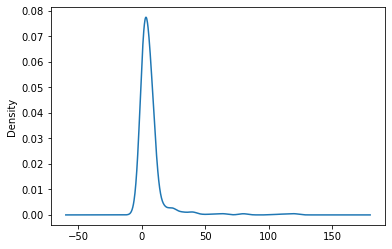

In [72]:
data_preprocessed['Absenteeism time in hours'].plot(kind='kde')

In [73]:
data_preprocessed['Absenteeism time in hours'].mean(), data_preprocessed['Absenteeism time in hours'].std(), data_preprocessed['Absenteeism time in hours'].median(), data_preprocessed['Absenteeism time in hours'].min(), data_preprocessed['Absenteeism time in hours'].max()

(6.924324324324324, 13.330998100978235, 3.0, 0, 120)

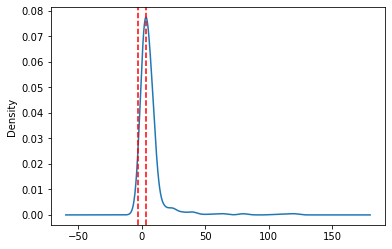

In [74]:
ax = data_preprocessed['Absenteeism time in hours'].plot(kind='kde')
# you can add here as many lines as you want
# ax.axhline(6, color="red", linestyle="--")
ax.axvline(data_preprocessed['Absenteeism time in hours'].median(), color="red", linestyle="--")
ax.axvline(-data_preprocessed['Absenteeism time in hours'].median(), color="red", linestyle="--")

In [75]:
targets = np.where(data_preprocessed['Absenteeism time in hours'] > data_preprocessed['Absenteeism time in hours'].median(), 1, 0)

In [76]:
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [7]:
targets.sum() / targets.shape[0] # balance dataset 55-45

0.4581081081081081

In [8]:
# # Experimenting with mean
# targets1 = np.where(data_preprocessed['Absenteeism time in hours'] > data_preprocessed['Absenteeism time in hours'].mean(), 1, 0)
# targets1.sum()/targets1.shape[0]

In [9]:
data_preprocessed['Excessive Absenteeism'] = targets
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Excessive Absenteeism
0,0,0,0,1,7,3,1,289,36,13,...,0,2,1,0,1,90,172,30,4,1
1,0,0,0,0,7,3,1,118,13,18,...,0,1,1,0,0,98,178,31,0,0
2,0,0,0,1,7,4,1,179,51,18,...,0,0,1,0,0,89,170,31,2,0
3,1,0,0,0,7,5,1,279,5,14,...,0,2,1,1,0,68,168,24,4,1
4,0,0,0,1,7,5,1,289,36,13,...,0,2,1,0,1,90,172,30,2,0


In [10]:
data_with_targets = data_preprocessed.drop(['Absenteeism time in hours'], axis=1)

In [11]:
data_with_targets.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Excessive Absenteeism
0,0,0,0,1,7,3,1,289,36,13,...,0,0,2,1,0,1,90,172,30,1
1,0,0,0,0,7,3,1,118,13,18,...,1,0,1,1,0,0,98,178,31,0
2,0,0,0,1,7,4,1,179,51,18,...,0,0,0,1,0,0,89,170,31,0
3,1,0,0,0,7,5,1,279,5,14,...,0,0,2,1,1,0,68,168,24,1
4,0,0,0,1,7,5,1,289,36,13,...,0,0,2,1,0,1,90,172,30,0


In [12]:
data_with_targets is data_preprocessed

False

## Selecting the inputs

In [13]:
data_with_targets.iloc[:,0:22]
# data_with_targets.iloc[:,:22]
# data_with_targets.iloc[:,:-1]

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,...,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,0,0,0,1,7,3,1,289,36,13,...,97,0,0,2,1,0,1,90,172,30
1,0,0,0,0,7,3,1,118,13,18,...,97,1,0,1,1,0,0,98,178,31
2,0,0,0,1,7,4,1,179,51,18,...,97,0,0,0,1,0,0,89,170,31
3,1,0,0,0,7,5,1,279,5,14,...,97,0,0,2,1,1,0,68,168,24
4,0,0,0,1,7,5,1,289,36,13,...,97,0,0,2,1,0,1,90,172,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,1,0,0,0,7,3,1,289,36,13,...,93,0,0,2,1,0,1,90,172,30
736,1,0,0,0,7,3,1,235,11,14,...,93,0,1,1,0,0,1,88,172,29
737,0,0,0,0,0,3,1,118,14,13,...,95,0,0,1,1,0,8,98,170,34
738,0,0,0,0,0,4,2,231,35,14,...,95,0,0,2,1,0,2,100,170,35


In [14]:
unscaled_inputs = data_with_targets.iloc[:,:-1]

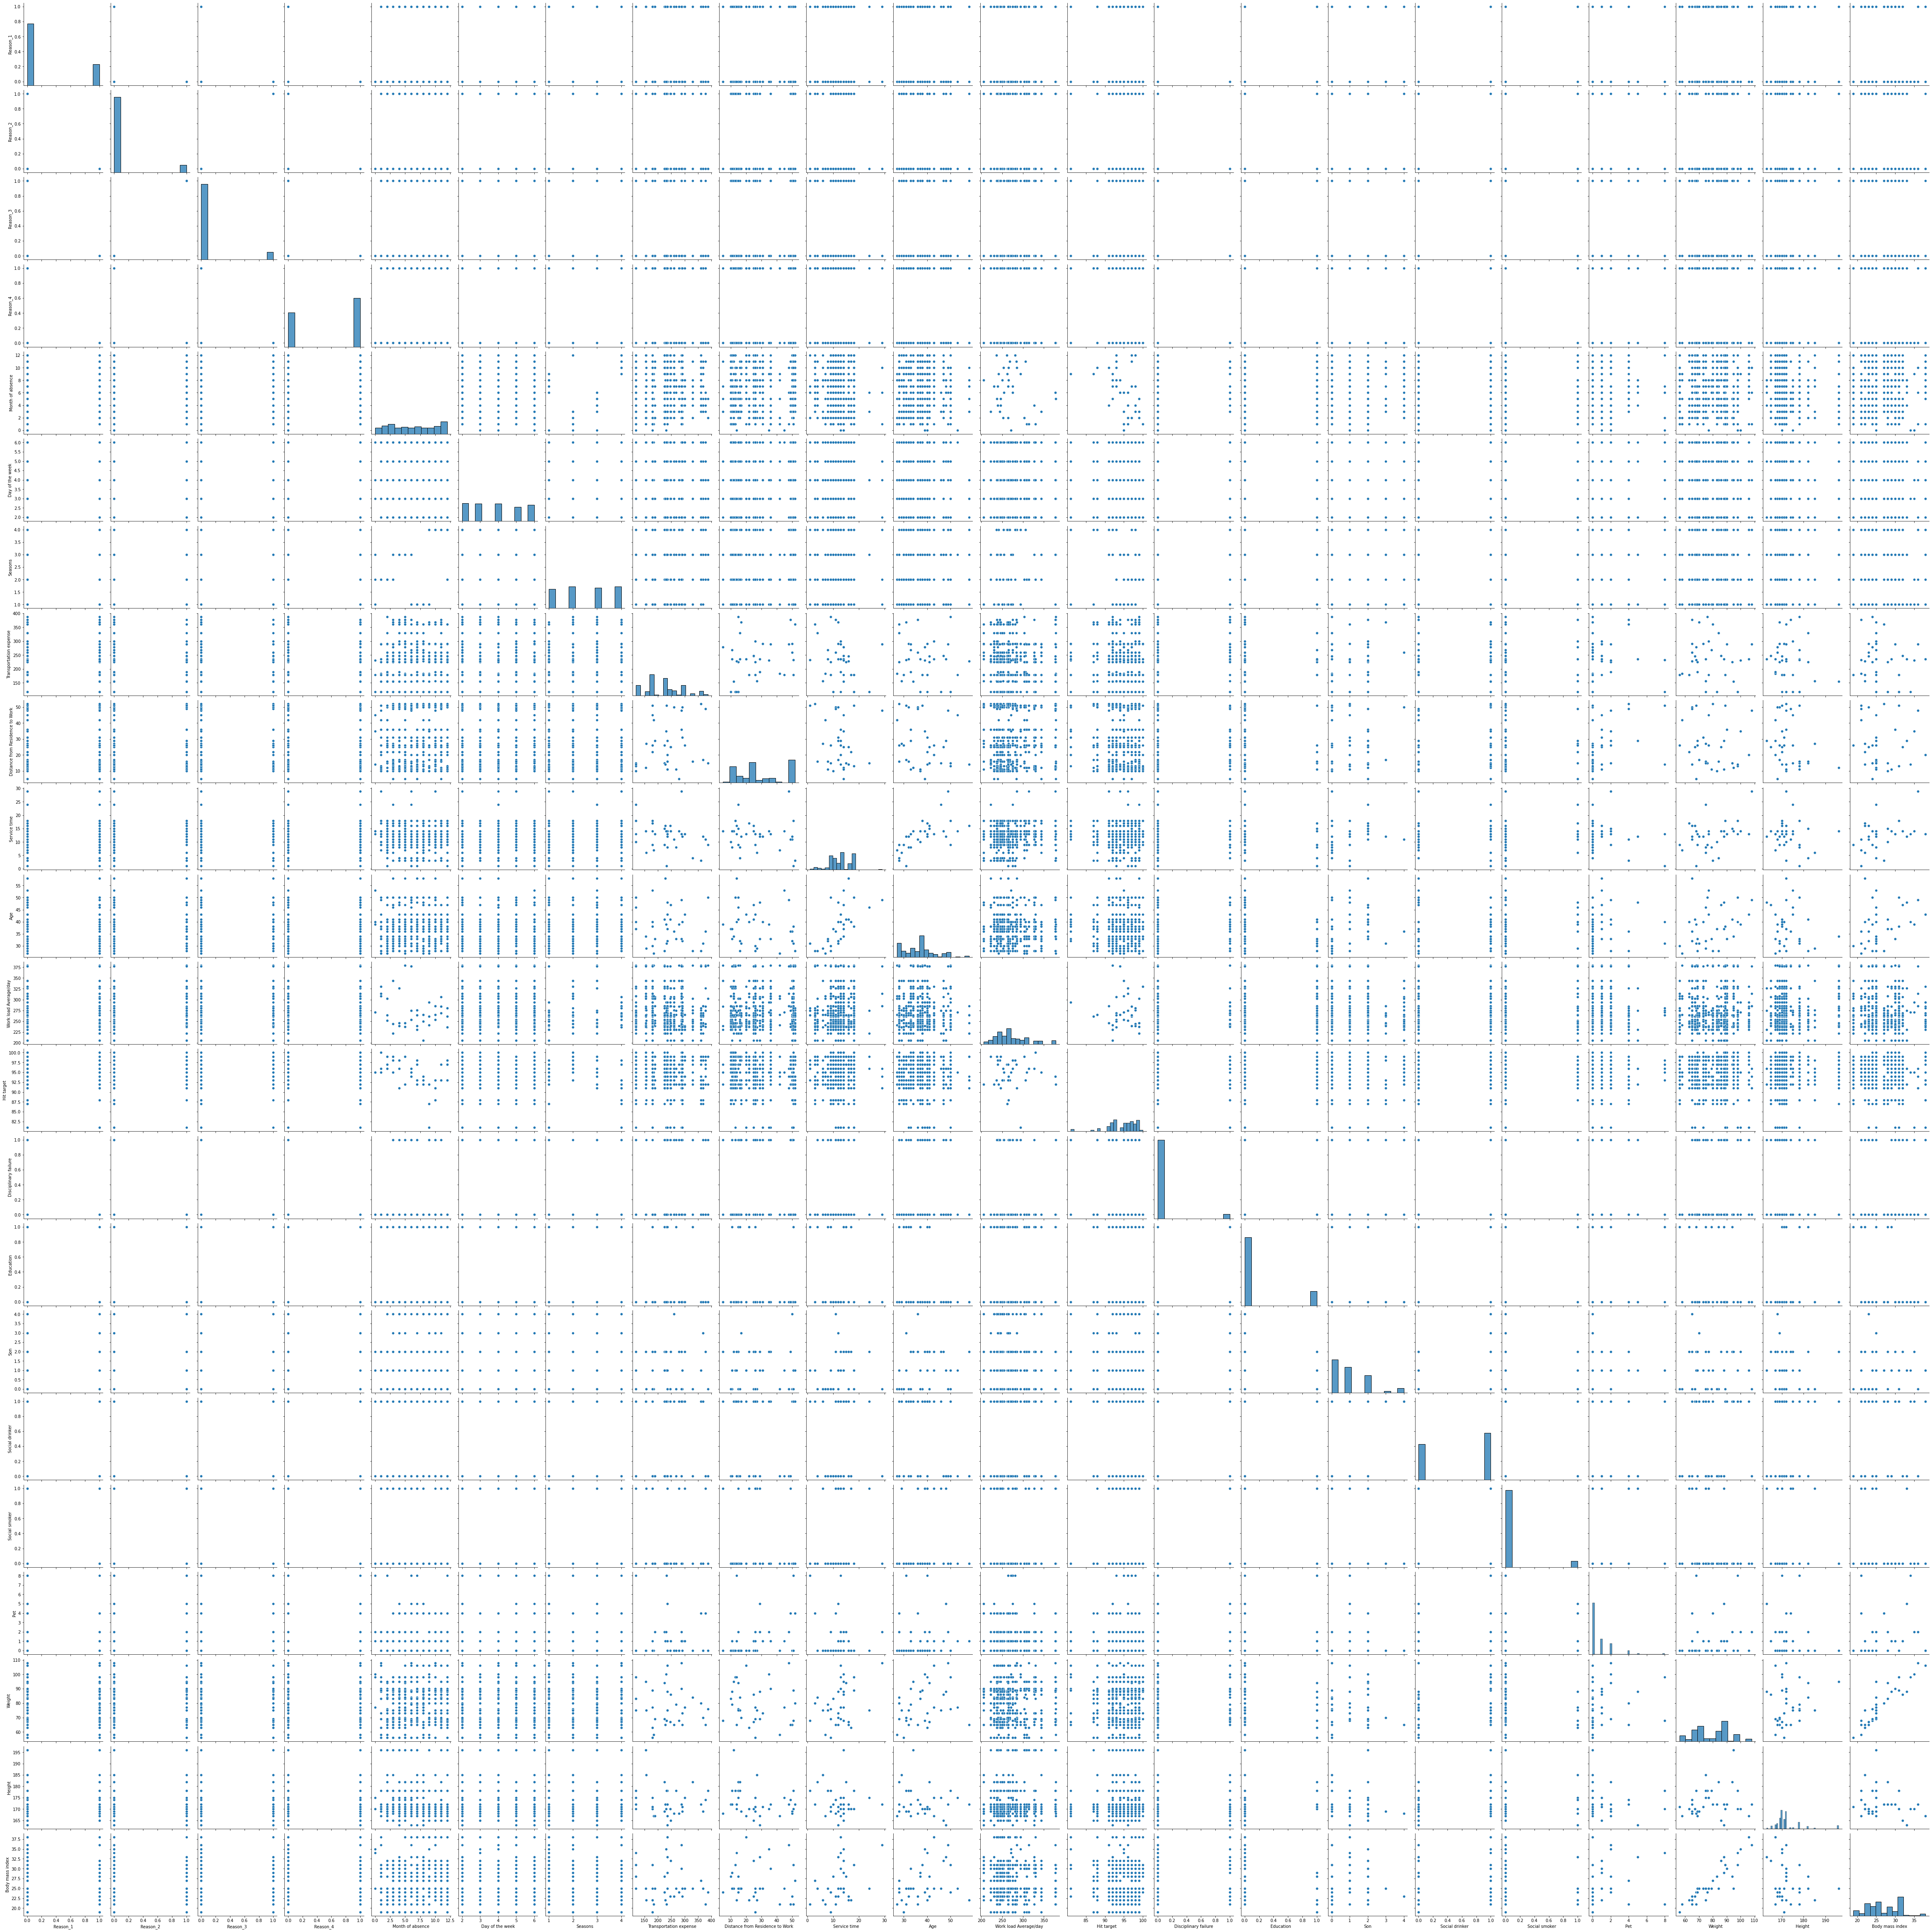

In [15]:
import seaborn as sns

sns.pairplot(unscaled_inputs, height=3.0)

## Data Reduction - Feature selection

### Using Pearson Correlation

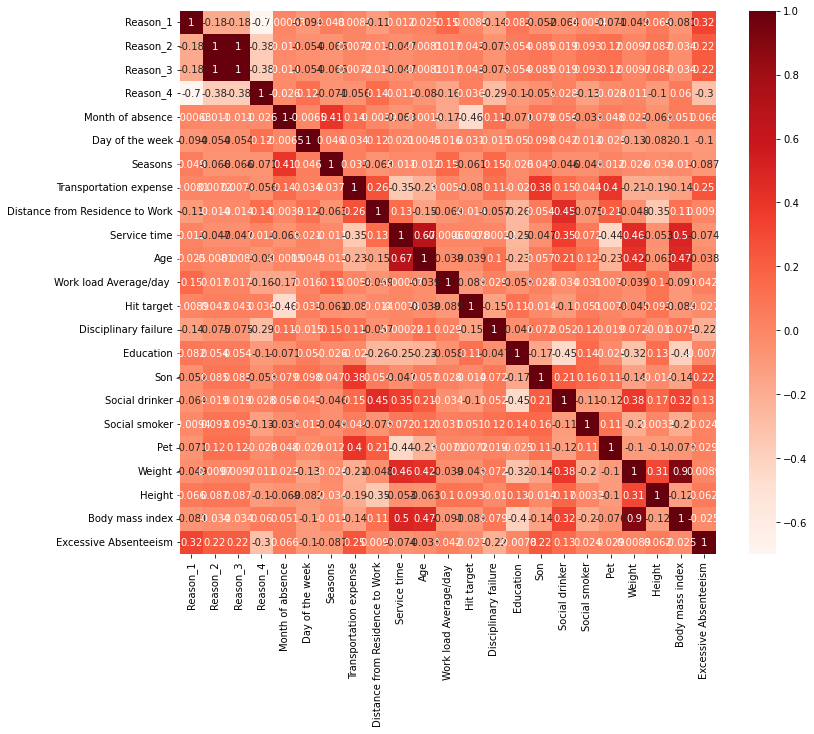

In [16]:
plt.figure(figsize=(12,10))
cor = data_with_targets.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [17]:
cor

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Excessive Absenteeism
Reason_1,1.000000,-0.184793,-0.184793,-0.699439,0.000634,-0.093592,0.047613,0.008090,-0.111246,0.011516,...,-0.140003,0.082109,-0.052437,-0.064240,-0.009435,-0.070530,-0.048533,0.065918,-0.081011,0.319790
Reason_2,-0.184793,1.000000,1.000000,-0.376812,-0.010600,-0.054017,-0.065645,0.007173,-0.013747,-0.047418,...,-0.075424,0.053627,0.084651,0.018755,0.092537,0.121619,0.009747,0.086913,-0.034486,0.220291
Reason_3,-0.184793,1.000000,1.000000,-0.376812,-0.010600,-0.054017,-0.065645,0.007173,-0.013747,-0.047418,...,-0.075424,0.053627,0.084651,0.018755,0.092537,0.121619,0.009747,0.086913,-0.034486,0.220291
Reason_4,-0.699439,-0.376812,-0.376812,1.000000,-0.025648,0.119875,-0.071407,-0.056110,0.135259,0.010643,...,-0.285480,-0.100087,-0.053094,0.028307,-0.134511,-0.028106,0.010602,-0.102865,0.059935,-0.304586
Month of absence,0.000634,-0.010600,-0.010600,-0.025648,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,...,0.107946,-0.071403,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.066388
Day of the week,-0.093592,-0.054017,-0.054017,0.119875,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,...,-0.015120,0.050099,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.101446
Seasons,0.047613,-0.065645,-0.065645,-0.071407,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,...,0.151766,-0.026457,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.086945
Transportation expense,0.008090,0.007173,0.007173,-0.056110,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,...,0.109222,-0.019566,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.246761
Distance from Residence to Work,-0.111246,-0.013747,-0.013747,0.135259,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,...,-0.056527,-0.256430,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,0.009341
Service time,0.011516,-0.047418,-0.047418,0.010643,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,...,-0.000221,-0.250748,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,-0.074167


In [18]:
#Correlation with output variable
cor_target = abs(cor["Excessive Absenteeism"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

Reason_1                  0.319790
Reason_2                  0.220291
Reason_3                  0.220291
Reason_4                  0.304586
Month of absence          0.066388
Day of the week           0.101446
Seasons                   0.086945
Transportation expense    0.246761
Service time              0.074167
Disciplinary failure      0.219790
Son                       0.223815
Social drinker            0.134648
Height                    0.061639
Excessive Absenteeism     1.000000
Name: Excessive Absenteeism, dtype: float64

In [19]:
relevant_features.index.values[4:13]

array(['Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Service time', 'Disciplinary failure',
       'Son', 'Social drinker', 'Height'], dtype=object)

In [20]:
# columns_to_scale = ['Month of absence', 'Day of the week', 'Seasons', 'Transportation expense',
#        'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Son', 'Pet',
#        'Weight', 'Height', 'Body mass index']
columns_to_scale = relevant_features.index.values[4:13]

In [21]:
len(columns_to_scale)

9

In [22]:
unscaled_inputs_corr = unscaled_inputs[columns_to_scale]
unscaled_inputs_corr

,Month of absence,Day of the week,Seasons,Transportation expense,Service time,Disciplinary failure,Son,Social drinker,Height
0,7,3,1,289,13,0,2,1,172
1,7,3,1,118,18,1,1,1,178
2,7,4,1,179,18,0,0,1,170
3,7,5,1,279,14,0,2,1,168
4,7,5,1,289,13,0,2,1,172
...,...,...,...,...,...,...,...,...,...
735,7,3,1,289,13,0,2,1,172
736,7,3,1,235,14,0,1,0,172
737,0,3,1,118,13,0,1,1,170
738,0,4,2,231,14,0,2,1,170


In [23]:
absenteeism_scaler = ColumnTransformer([
        ('somename', StandardScaler(), columns_to_scale)
    ], remainder='passthrough')
absenteeism_scaler

ColumnTransformer(remainder='passthrough',
                  transformers=[('somename', StandardScaler(),
                                 array(['Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Service time', 'Disciplinary failure',
       'Son', 'Social drinker', 'Height'], dtype=object))])

In [24]:
absenteeism_scaler.fit(unscaled_inputs_corr)

ColumnTransformer(remainder='passthrough',
                  transformers=[('somename', StandardScaler(),
                                 array(['Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Service time', 'Disciplinary failure',
       'Son', 'Social drinker', 'Height'], dtype=object))])

In [25]:
scaled_inputs_corr = absenteeism_scaler.transform(unscaled_inputs_corr)

In [26]:
scaled_inputs_corr.shape

(740, 9)

### Forward selection

In [27]:
fs_feature_selector = SequentialFeatureSelector(LogisticRegression(n_jobs=-1),
           k_features=10,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4)

In [28]:
X_train_fs = unscaled_inputs
y_train_fs = data_with_targets['Excessive Absenteeism']
fs_features = fs_feature_selector.fit(X_train_fs, y_train_fs)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   11.5s finished

[2022-02-20 15:47:10] Features: 1/10 -- score: 0.6505988781651274[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s finished

[2022-02-20 15:47:11] Features: 2/10 -- score: 0.7248605125218404[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.8s finished

[2022-02-20 15:47:12] Features: 3/10 -- score: 0.7952991860110381[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [29]:
fs_filtered_features = X_train_fs.columns[list(fs_features.k_feature_idx_)]
fs_filtered_features

Index(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Day of the week',
       'Transportation expense', 'Disciplinary failure', 'Son',
       'Social drinker', 'Pet'],
      dtype='object')

In [30]:
fs_filtered_features.values[4:,]

array(['Day of the week', 'Transportation expense',
       'Disciplinary failure', 'Son', 'Social drinker', 'Pet'],
      dtype=object)

In [31]:
# Standardize features (reason features already standardized so no need to apply StandardScaler)
absenteeism_scaler_fs = ColumnTransformer([
        ('fs', StandardScaler(), fs_filtered_features.values[4:,])
    ], remainder='passthrough')
absenteeism_scaler_fs

ColumnTransformer(remainder='passthrough',
                  transformers=[('fs', StandardScaler(),
                                 array(['Day of the week', 'Transportation expense',
       'Disciplinary failure', 'Son', 'Social drinker', 'Pet'],
      dtype=object))])

In [32]:
unscaled_inputs[fs_filtered_features.values]

,Reason_1,Reason_2,Reason_3,Reason_4,Day of the week,Transportation expense,Disciplinary failure,Son,Social drinker,Pet
0,0,0,0,1,3,289,0,2,1,1
1,0,0,0,0,3,118,1,1,1,0
2,0,0,0,1,4,179,0,0,1,0
3,1,0,0,0,5,279,0,2,1,0
4,0,0,0,1,5,289,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...
735,1,0,0,0,3,289,0,2,1,1
736,1,0,0,0,3,235,0,1,0,1
737,0,0,0,0,3,118,0,1,1,8
738,0,0,0,0,4,231,0,2,1,2


In [33]:
absenteeism_scaler_fs.fit(unscaled_inputs[fs_filtered_features.values])

ColumnTransformer(remainder='passthrough',
                  transformers=[('fs', StandardScaler(),
                                 array(['Day of the week', 'Transportation expense',
       'Disciplinary failure', 'Son', 'Social drinker', 'Pet'],
      dtype=object))])

In [34]:
scaled_inputs_fs = absenteeism_scaler_fs.transform(unscaled_inputs[fs_filtered_features.values])

In [35]:
scaled_inputs_fs.shape

(740, 10)

### Backward Selection

In [36]:
bs_feature_selector = SequentialFeatureSelector(LogisticRegression(n_jobs=-1),
           k_features=10,
           forward=False,
           verbose=2,
           scoring='roc_auc',
           cv=4)

x_train = unscaled_inputs
y_train = data_with_targets['Excessive Absenteeism']
bs_features = bs_feature_selector.fit(x_train, y_train)

bs_filtered_features = x_train.columns[list(bs_features.k_feature_idx_)]
bs_filtered_features

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    1.7s finished

[2022-02-20 15:47:22] Features: 21/10 -- score: 0.7389779931774689[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.7s finished

[2022-02-20 15:47:24] Features: 20/10 -- score: 0.7521939706575701[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.6s finished

[2022-02-20 15:47:25] Features: 19/10 -- score: 0.7613156113930721[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

Index(['Reason_1', 'Reason_2', 'Reason_3', 'Day of the week',
       'Transportation expense', 'Disciplinary failure', 'Son',
       'Social drinker', 'Pet', 'Height'],
      dtype='object')

### Recursive Feature Elimination (RFE)

Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

In [37]:
x_train = unscaled_inputs
y_train = data_with_targets['Excessive Absenteeism']

names = pd.DataFrame(x_train.columns)

log_reg = LogisticRegression()

rfe_mod = RFE(log_reg, 10, step=1) 
myvalues = rfe_mod.fit(x_train,y_train) 
myvalues.support_
myvalues.ranking_ 

rankings = pd.DataFrame(myvalues.ranking_) 

ranked = pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

most_important = ranked.loc[ranked['Rank'] == 1] 
print(most_important)

most_important['Rank'].count()

C:\Users\Pedro Alves\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Pedro Alves\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pedro Alves\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS

                 Feature  Rank
0               Reason_1     1
1               Reason_2     1
2               Reason_3     1
4       Month of absence     1
5        Day of the week     1
6                Seasons     1
13  Disciplinary failure     1
14             Education     1
15                   Son     1
16        Social drinker     1


C:\Users\Pedro Alves\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pedro Alves\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

10

### Recursive Feature Elimination Cross Validation (RFECV)

In [38]:
x_train = unscaled_inputs
y_train = data_with_targets['Excessive Absenteeism']

names = pd.DataFrame(x_train.columns)

log_reg = LogisticRegression()

rfe_mod =  RFECV(log_reg, step=1, cv=5, min_features_to_select=10)

myvalues = rfe_mod.fit(x_train,y_train)
myvalues.support_
myvalues.ranking_ 

rankings = pd.DataFrame(myvalues.ranking_)

ranked = pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

most_important = ranked.loc[ranked['Rank'] == 1] 
print(most_important)

most_important['Rank'].count()

C:\Users\Pedro Alves\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pedro Alves\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Pedro Alves\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pedro Alves\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Pedro Alves\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pedro Alves\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Pedro Alves\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pedro Alves\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

                 Feature  Rank
0               Reason_1     1
1               Reason_2     1
2               Reason_3     1
3               Reason_4     1
4       Month of absence     1
5        Day of the week     1
6                Seasons     1
9           Service time     1
12            Hit target     1
13  Disciplinary failure     1
14             Education     1
15                   Son     1
16        Social drinker     1
18                   Pet     1
21       Body mass index     1


C:\Users\Pedro Alves\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pedro Alves\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

15

### Univariate Selection

Feature Extraction with Univariate Statistical Tests (f_regression)

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.datasets import load_digits

x_train = unscaled_inputs
y_train = data_with_targets['Excessive Absenteeism']

names = pd.DataFrame(x_train.columns)

model = SelectKBest(score_func=f_regression, k=4)
results = model.fit(x_train, y_train)

print (results.scores_)
#print (results.pvalues_)

results_df = pd.DataFrame(results.scores_)
#Concat and name columns
scored = pd.concat([names,results_df], axis=1)
scored.columns = ["Feature", "Score"]
scored.sort_values(by=['Score'])

[8.40693041e+01 3.76403436e+01 3.76403436e+01 7.54674751e+01
 3.26705464e+00 7.67399621e+00 5.62141969e+00 4.78510732e+01
 6.43989887e-02 4.08198077e+00 1.06344832e+00 1.27807232e+00
 5.58056916e-01 3.74608071e+01 4.53053760e-02 3.89183086e+01
 1.36270496e+01 4.10910336e-01 6.24599047e-01 5.80265341e-02
 2.81465785e+00 4.62423490e-01]


,Feature,Score
14,Education,0.045305
19,Weight,0.058027
8,Distance from Residence to Work,0.064399
17,Social smoker,0.410910
21,Body mass index,0.462423
12,Hit target,0.558057
18,Pet,0.624599
10,Age,1.063448
11,Work load Average/day,1.278072
20,Height,2.814658


In [40]:
scored = scored.sort_values(by=['Score'])
features_uni_sel = scored['Feature'].tail(10)
features_uni_sel.sort_index()

0                   Reason_1
1                   Reason_2
2                   Reason_3
3                   Reason_4
5            Day of the week
6                    Seasons
7     Transportation expense
13      Disciplinary failure
15                       Son
16            Social drinker
Name: Feature, dtype: object

In [41]:
absenteeism_scaler_uni = ColumnTransformer([
        ('uni', StandardScaler(), features_uni_sel.sort_index().values[4:,])
    ], remainder='passthrough')
absenteeism_scaler_uni

ColumnTransformer(remainder='passthrough',
                  transformers=[('uni', StandardScaler(),
                                 array(['Day of the week', 'Seasons', 'Transportation expense',
       'Disciplinary failure', 'Son', 'Social drinker'], dtype=object))])

In [42]:
absenteeism_scaler_uni.fit(unscaled_inputs[features_uni_sel.sort_index().values[4:,]])

ColumnTransformer(remainder='passthrough',
                  transformers=[('uni', StandardScaler(),
                                 array(['Day of the week', 'Seasons', 'Transportation expense',
       'Disciplinary failure', 'Son', 'Social drinker'], dtype=object))])

In [43]:
scaled_inputs_uni = absenteeism_scaler_uni.transform(unscaled_inputs[features_uni_sel.sort_index().values[4:,]])

In [44]:
scaled_inputs_uni.shape

(740, 6)

In [45]:
scaled_inputs_uni

array([[-0.64394734, -1.3901746 ,  1.01140838, -0.23904572,  0.89372277,
         0.87287156],
       [-0.64394734, -1.3901746 , -1.54437915,  4.18330013, -0.01723432,
         0.87287156],
       [ 0.0599242 , -1.3901746 , -0.63266547, -0.23904572, -0.92819141,
         0.87287156],
       ...,
       [-0.64394734, -1.3901746 , -1.54437915, -0.23904572, -0.01723432,
         0.87287156],
       [ 0.0599242 , -0.49014905,  0.14453308, -0.23904572,  0.89372277,
         0.87287156],
       [ 1.46766727,  0.4098765 , -0.63266547, -0.23904572, -0.01723432,
        -1.14564392]])

### Shrinkage

In [46]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# Use L1 penalty
estimator = LassoCV(cv=5, normalize = True)

# Set a minimum threshold of 0.25
sfm = SelectFromModel(estimator, threshold=-np.inf, prefit=False, norm_order=1, max_features=10)

x_train = unscaled_inputs
y_train = data_with_targets['Excessive Absenteeism']
sfm.fit(x_train, y_train)

feature_idx = sfm.get_support()
feature_name = x_train.columns[feature_idx]
feature_name

# n_features = sfm.transform(X).shape[1]
# n_features

Index(['Reason_1', 'Reason_2', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Disciplinary failure', 'Son',
       'Social drinker', 'Pet'],
      dtype='object')

## Modelling 

### Correlation Features

In [47]:
x_train, X_test, y_train, Y_test = train_test_split(scaled_inputs_corr, targets, train_size=0.8, random_state=20)

print(x_train.shape, y_train.shape)
print(X_test.shape, Y_test.shape)

(592, 9) (592,)
(148, 9) (148,)


In [48]:
reg_corr = LogisticRegression()
reg_corr.fit(x_train, y_train)

# accuracy
reg_corr.score(x_train, y_train)

0.6875

### Forward Selection Features

In [49]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(scaled_inputs_fs, targets, train_size=0.8, random_state=20)

print(X_train_fs.shape, y_train_fs.shape)
print(X_test_fs.shape, y_test_fs.shape)

(592, 10) (592,)
(148, 10) (148,)


In [50]:
reg_fs = LogisticRegression()
reg_fs.fit(X_train_fs, y_train_fs)

# accuracy
reg_fs.score(X_train_fs, y_train_fs)

0.7567567567567568

### Univariate Selection Features

In [51]:
x_train, X_test, y_train, Y_test = train_test_split(scaled_inputs_uni, targets, train_size=0.8, random_state=20)

print(x_train.shape, y_train.shape)
print(X_test.shape, Y_test.shape)

(592, 6) (592,)
(148, 6) (148,)


In [52]:
reg_uni = LogisticRegression()
reg_uni.fit(x_train, y_train)

# accuracy
reg_uni.score(x_train, y_train)

0.668918918918919

Best accuracy is given with features slected by forward selection method!

## Finding the intercept and coefficient

In [53]:
reg_fs.intercept_

array([-0.27481767])

In [54]:
reg_fs.coef_

array([[-0.23431615,  0.60780516, -1.27408071,  0.40273437,  0.29642275,
        -0.26920799,  1.14542437,  0.76434417,  0.76434417, -0.67723485]])

In [55]:
feature_name = unscaled_inputs.columns.values

In [56]:
feature_name

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month of absence',
       'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet',
       'Weight', 'Height', 'Body mass index'], dtype=object)

In [57]:
summary_table = pd.DataFrame(columns=['Feature Name'], data = fs_filtered_features)

summary_table['Coefficent'] = np.transpose(reg_fs.coef_)

summary_table

,Feature Name,Coefficent
0,Reason_1,-0.234316
1,Reason_2,0.607805
2,Reason_3,-1.274081
3,Reason_4,0.402734
4,Day of the week,0.296423
5,Transportation expense,-0.269208
6,Disciplinary failure,1.145424
7,Son,0.764344
8,Social drinker,0.764344
9,Pet,-0.677235


In [58]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_fs.intercept_[0]]
summary_table.sort_index(inplace=True)
summary_table

,Feature Name,Coefficent
0,Intercept,-0.274818
1,Reason_1,-0.234316
2,Reason_2,0.607805
3,Reason_3,-1.274081
4,Reason_4,0.402734
5,Day of the week,0.296423
6,Transportation expense,-0.269208
7,Disciplinary failure,1.145424
8,Son,0.764344
9,Social drinker,0.764344


## Interpreting the coefficients

### coefficients == weights and intercept == bias

In [59]:
summary_table['Odds Ratio'] = np.exp(summary_table.Coefficent)

In [60]:
summary_table

,Feature Name,Coefficent,Odds Ratio
0,Intercept,-0.274818,0.759711
1,Reason_1,-0.234316,0.791112
2,Reason_2,0.607805,1.836396
3,Reason_3,-1.274081,0.279688
4,Reason_4,0.402734,1.495909
5,Day of the week,0.296423,1.345039
6,Transportation expense,-0.269208,0.763984
7,Disciplinary failure,1.145424,3.143775
8,Son,0.764344,2.147585
9,Social drinker,0.764344,2.147585


In [61]:
summary_table.sort_values('Odds Ratio', ascending=False)

,Feature Name,Coefficent,Odds Ratio
7,Disciplinary failure,1.145424,3.143775
8,Son,0.764344,2.147585
9,Social drinker,0.764344,2.147585
2,Reason_2,0.607805,1.836396
4,Reason_4,0.402734,1.495909
5,Day of the week,0.296423,1.345039
1,Reason_1,-0.234316,0.791112
6,Transportation expense,-0.269208,0.763984
0,Intercept,-0.274818,0.759711
10,Pet,-0.677235,0.508020


## Test Model

In [62]:
reg_fs.score(X_test_fs, y_test_fs)

0.75

In [63]:
predict_proba = reg_fs.predict_proba(X_test_fs)

In [64]:
predict_proba

array([[0.53020578, 0.46979422],
       [0.08765389, 0.91234611],
       [0.87401092, 0.12598908],
       [0.87401092, 0.12598908],
       [0.49841734, 0.50158266],
       [0.57099182, 0.42900818],
       [0.4873302 , 0.5126698 ],
       [0.41673585, 0.58326415],
       [0.73276699, 0.26723301],
       [0.88040348, 0.11959652],
       [0.14740562, 0.85259438],
       [0.86191986, 0.13808014],
       [0.73276699, 0.26723301],
       [0.70543049, 0.29456951],
       [0.45261581, 0.54738419],
       [0.29634536, 0.70365464],
       [0.73276699, 0.26723301],
       [0.15424483, 0.84575517],
       [0.79512258, 0.20487742],
       [0.45261581, 0.54738419],
       [0.73276699, 0.26723301],
       [0.73850674, 0.26149326],
       [0.69926038, 0.30073962],
       [0.80153601, 0.19846399],
       [0.3070489 , 0.6929511 ],
       [0.45728956, 0.54271044],
       [0.33905593, 0.66094407],
       [0.5406914 , 0.4593086 ],
       [0.49841734, 0.50158266],
       [0.35625281, 0.64374719],
       [0.

In [65]:
predict_proba[:,1]

array([0.46979422, 0.91234611, 0.12598908, 0.12598908, 0.50158266,
       0.42900818, 0.5126698 , 0.58326415, 0.26723301, 0.11959652,
       0.85259438, 0.13808014, 0.26723301, 0.29456951, 0.54738419,
       0.70365464, 0.26723301, 0.84575517, 0.20487742, 0.54738419,
       0.26723301, 0.26149326, 0.30073962, 0.19846399, 0.6929511 ,
       0.54271044, 0.66094407, 0.4593086 , 0.50158266, 0.64374719,
       0.17352461, 0.72610095, 0.90814599, 0.92466954, 0.80090252,
       0.12598908, 0.46979422, 0.44148731, 0.25615208, 0.95566722,
       0.98148442, 0.22600754, 0.91082705, 0.688177  , 0.61457273,
       0.31417243, 0.38916408, 0.57200468, 0.23091529, 0.46979422,
       0.19846399, 0.80574611, 0.00519304, 0.62807334, 0.64540059,
       0.49221814, 0.16699988, 0.75123266, 0.7714856 , 0.9660109 ,
       0.26723301, 0.33651805, 0.45670933, 0.22600754, 0.22600754,
       0.33651805, 0.75837835, 0.68061379, 0.95502988, 0.19846399,
       0.61343005, 0.26288081, 0.68061379, 0.01538605, 0.26723

## Save the Model

In [66]:
import pickle

In [67]:
with open('model_fs', 'wb') as file:
    pickle.dump(reg_fs, file)

In [68]:
with open('scaler_fs', 'wb') as file:
    pickle.dump(absenteeism_scaler_fs, file)

In [69]:
# class absenteeism_model():
    
#     def __init__(self, model_file, scaler_file):
#         with open('model', 'wb') as model_file, open('scaler', 'rb') as scaler_file:
#             self.reg = pickle.load(model_file)
#             self.scaler = pickle.load(scaler_file)
#             self.data = None

#     def load_and_clean_data(self, data_file):

#         df = pd.read_csv('Absenteeism_at_work_AAA/Absenteeism_at_work.csv', sep=';')
#         self.df_with_predictions = df.copy()
#         df.drop(['ID'], axis=1, inplace=True)
#     #     df['Absenteeism time in Hours'] = 'NaN'
#         reason_columns = pd.get_dummies(df['Reason for absence'], drop_first=True)
#         df.drop(columns=['Reason for absence'], inplace=True)

#         reason_type_1 = reason_columns.loc[:, 1:14].max(axis=1) # diseases
#         reason_type_2 = reason_columns.loc[:, 15:17].max(axis=1) # Injuries
#         reason_type_3 = reason_columns.loc[:, 18:21].max(axis=1) # Pregnancy related
#         reason_type_4 = reason_columns.loc[:, 22:28].max(axis=1) # routine stuff

#         df = pd.concat([df, reason_type_1, reason_type_3, reason_type_3, reason_type_4], axis=1)

#         cols = ['Reason_1', 'Reason_2', 'Reason_3','Reason_4', 'Month of absence', 'Day of the week', 'Seasons', 
#                 'Transportation expense', 'Distance from Residence to Work','Service time', 'Age', 
#                 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker',
#                 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']
#         df = df[cols]
        
#         df['Education'] = df['Education'].map({1:0, 2:1, 3:1, 4:1})
        
#         df.drop(['Absenteeism time in hours'], axis=1, inplace=True)
        
#         self.pre_processed_data = df.copy()
        
#         self.data = self.scaler.transform(df)
        
#     def predicted_probability(self):
#         if (self.data is not None):
#             pred = self.reg.predic_proba(self.data)[:,1]
#             return pred
        
#     def predicted_output_category(self):
#         if(self.data is not None):
#             pred_outputs = self.reg.predict(self.data)
#             return pred_outputs
        
#     def predicted_outputs(self):
#         if(self.data is not None):
#             self.preprocessed_data['Probability'] = self.reg.predict_proba(self.data)[:,1]
#             self.preprocessed_data['Prediction'] = self.reg.predict(self.data)
#             return self.preprocessed_data
        
        
        
    
    
    
    
    